In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
import glob
import math

In [2]:
import os
import time
import unicodedata
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
from pylab import rcParams
from tqdm import tqdm_notebook
from xgboost import XGBRegressor
from datetime import date
from matplotlib import pyplot as plt

In [3]:
path = '/Users/kate/CSCE633/microsoft'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

microsoft = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [4]:
# microsoft = pd.DataFrame(microsoft.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
microsoft[['DATE','TIME']] = microsoft.DATETIME.str.split(expand=True)
microsoft[["YEAR", "MONTH", "DAY"]] = microsoft.DATE.str.split(".", expand=True)
microsoft[["HOUR", "MINUTES", "SECONDS"]] = microsoft.TIME.str.split(":", expand=True)

In [5]:
microsoft.loc[:, 'DATE'] = pd.to_datetime(microsoft['DATE'],format='%Y.%m.%d')
microsoft = microsoft.sort_values(['DATETIME'])

In [6]:
new_microsoft = microsoft
microsoft.head()


,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
8773,2004.01.23 09:30:00,28.27,28.62,28.53,28.22,255885,21336,28.438,2004-01-23,09:30:00,2004,01,23,09,30,00
8774,2004.01.23 10:00:00,28.54,28.76,28.66,28.52,229302,24071,28.651,2004-01-23,10:00:00,2004,01,23,10,00,00
8775,2004.01.23 11:00:00,28.66,28.70,28.55,28.52,156298,17527,28.613,2004-01-23,11:00:00,2004,01,23,11,00,00
8776,2004.01.23 12:00:00,28.55,28.59,28.41,28.40,125556,14631,28.497,2004-01-23,12:00:00,2004,01,23,12,00,00
8777,2004.01.23 13:00:00,28.41,28.61,28.48,28.37,137064,14527,28.485,2004-01-23,13:00:00,2004,01,23,13,00,00


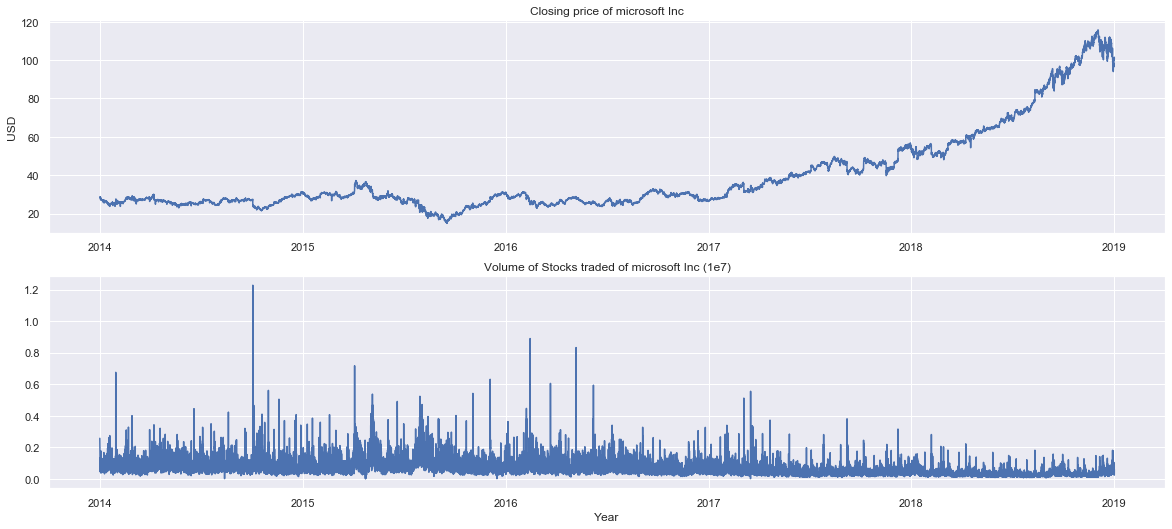

In [8]:
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2014, 2019, num = 26208)
ax[0].plot(date, microsoft['CLOSE'])
ax[0].set_title('Closing price of microsoft Inc')
ax[0].set_ylabel("USD")

ax[1].plot(date, microsoft['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of microsoft Inc (1e7)')
ax[1].set_xlabel("Year")

plt.show()

Text(0, 0.5, 'USD')

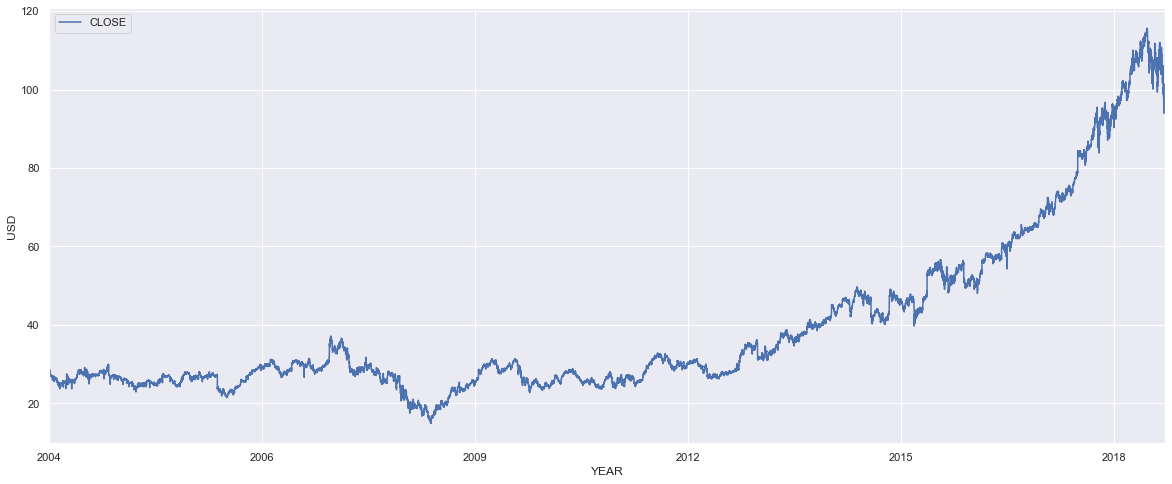

In [9]:
rcParams['figure.figsize'] = 20, 8 # width 10, height 8

ax = microsoft.plot(x='YEAR', y='CLOSE', style='b-', grid=True)
ax.set_xlabel("YEAR")
ax.set_ylabel("USD")

In [10]:
microsoft.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS
8773,2004.01.23 09:30:00,28.27,28.62,28.53,28.22,255885,21336,28.438,2004-01-23,09:30:00,2004,01,23,09,30,00
8774,2004.01.23 10:00:00,28.54,28.76,28.66,28.52,229302,24071,28.651,2004-01-23,10:00:00,2004,01,23,10,00,00
8775,2004.01.23 11:00:00,28.66,28.70,28.55,28.52,156298,17527,28.613,2004-01-23,11:00:00,2004,01,23,11,00,00
8776,2004.01.23 12:00:00,28.55,28.59,28.41,28.40,125556,14631,28.497,2004-01-23,12:00:00,2004,01,23,12,00,00
8777,2004.01.23 13:00:00,28.41,28.61,28.48,28.37,137064,14527,28.485,2004-01-23,13:00:00,2004,01,23,13,00,00


Text(0, 0.5, 'USD')

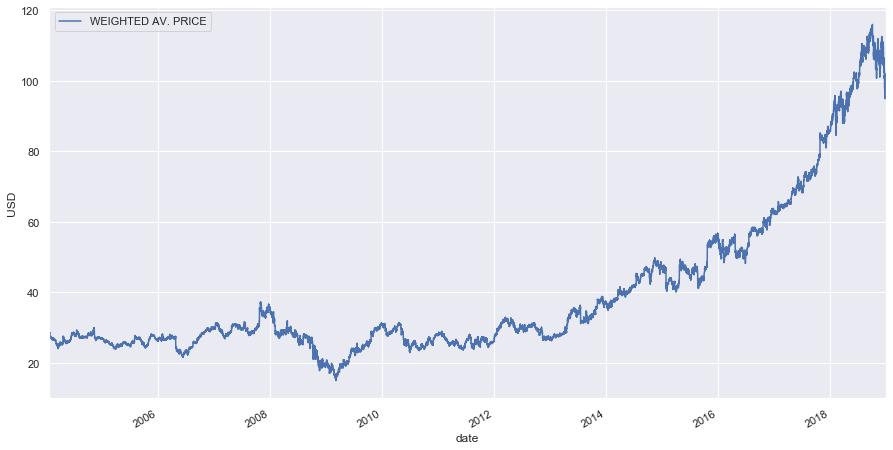

In [11]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = microsoft.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [12]:
# Get difference between high and low of each hour
microsoft['RANGE_HL'] = microsoft['HIGH'] - microsoft['LOW']
#df.drop(['high', 'low'], axis=1, inplace=True)

# Get difference between open and close of each hour
microsoft['RANGE_OC'] = microsoft['OPEN'] - microsoft['CLOSE']
#df.drop(['open', 'close'], axis=1, inplace=True)

microsoft.head(10)

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,RANGE_HL,RANGE_OC
8773,2004.01.23 09:30:00,28.27,28.62,28.53,28.22,255885,21336,28.438,2004-01-23,09:30:00,2004,01,23,09,30,00,0.09,0.05
8774,2004.01.23 10:00:00,28.54,28.76,28.66,28.52,229302,24071,28.651,2004-01-23,10:00:00,2004,01,23,10,00,00,0.10,0.02
8775,2004.01.23 11:00:00,28.66,28.70,28.55,28.52,156298,17527,28.613,2004-01-23,11:00:00,2004,01,23,11,00,00,0.15,0.14
8776,2004.01.23 12:00:00,28.55,28.59,28.41,28.40,125556,14631,28.497,2004-01-23,12:00:00,2004,01,23,12,00,00,0.18,0.15
8777,2004.01.23 13:00:00,28.41,28.61,28.48,28.37,137064,14527,28.485,2004-01-23,13:00:00,2004,01,23,13,00,00,0.13,0.04
8778,2004.01.23 14:00:00,28.48,28.56,28.48,28.39,103331,13055,28.488,2004-01-23,14:00:00,2004,01,23,14,00,00,0.08,0.09
8779,2004.01.23 15:00:00,28.47,28.51,28.49,28.28,156191,18716,28.410,2004-01-23,15:00:00,2004,01,23,15,00,00,0.02,0.19
8780,2004.01.26 09:30:00,28.49,28.73,28.65,28.48,67177,8311,28.629,2004-01-26,09:30:00,2004,01,26,09,30,00,0.08,0.01
8781,2004.01.26 10:00:00,28.69,28.69,28.43,28.34,98973,13669,28.476,2004-01-26,10:00:00,2004,01,26,10,00,00,0.26,0.35
8782,2004.01.26 11:00:00,28.42,28.47,28.38,28.32,60805,7886,28.391,2004-01-26,11:00:00,2004,01,26,11,00,00,0.09,0.10


In [13]:
 microsoft.drop(['HIGH', 'LOW', 'OPEN', 'CLOSE', 'DATETIME', 'MONTH', 'DAY', 'MINUTES', 'SECONDS'], axis=1, inplace=True)

In [14]:
microsoft.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC
8773,255885,21336,28.438,2004-01-23,09:30:00,2004,09,0.09,0.05
8774,229302,24071,28.651,2004-01-23,10:00:00,2004,10,0.10,0.02
8775,156298,17527,28.613,2004-01-23,11:00:00,2004,11,0.15,0.14
8776,125556,14631,28.497,2004-01-23,12:00:00,2004,12,0.18,0.15
8777,137064,14527,28.485,2004-01-23,13:00:00,2004,13,0.13,0.04
8778,103331,13055,28.488,2004-01-23,14:00:00,2004,14,0.08,0.09
8779,156191,18716,28.410,2004-01-23,15:00:00,2004,15,0.02,0.19
8780,67177,8311,28.629,2004-01-26,09:30:00,2004,09,0.08,0.01
8781,98973,13669,28.476,2004-01-26,10:00:00,2004,10,0.26,0.35
8782,60805,7886,28.391,2004-01-26,11:00:00,2004,11,0.09,0.10


In [15]:
microsoft['ORDER_HOURS'] = [x for x in list(range(len(microsoft)))]

# merging_keys
merging_keys = ['ORDER_HOURS']

# List of columns that we will use to create lags
lag_cols = ['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']
lag_cols

['WEIGHTED AV. PRICE', 'RANGE_HL', 'RANGE_OC', 'VOLUME']

In [16]:
microsoft.head(10)

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS
8773,255885,21336,28.438,2004-01-23,09:30:00,2004,09,0.09,0.05,0
8774,229302,24071,28.651,2004-01-23,10:00:00,2004,10,0.10,0.02,1
8775,156298,17527,28.613,2004-01-23,11:00:00,2004,11,0.15,0.14,2
8776,125556,14631,28.497,2004-01-23,12:00:00,2004,12,0.18,0.15,3
8777,137064,14527,28.485,2004-01-23,13:00:00,2004,13,0.13,0.04,4
8778,103331,13055,28.488,2004-01-23,14:00:00,2004,14,0.08,0.09,5
8779,156191,18716,28.410,2004-01-23,15:00:00,2004,15,0.02,0.19,6
8780,67177,8311,28.629,2004-01-26,09:30:00,2004,09,0.08,0.01,7
8781,98973,13669,28.476,2004-01-26,10:00:00,2004,10,0.26,0.35,8
8782,60805,7886,28.391,2004-01-26,11:00:00,2004,11,0.09,0.10,9


In [17]:
N = 7
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = microsoft[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['ORDER_HOURS'] = train_shift['ORDER_HOURS'] + shift
    
    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    microsoft = pd.merge(microsoft, train_shift, on=merging_keys, how='left') #.fillna(0)
    
    del train_shift

# Remove the first N rows which contain NaNs
microsoft = microsoft[N:]
    
microsoft.head(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_5,VOLUME_lag_5,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7
7,67177,8311,28.629,2004-01-26,09:30:00,2004,09,0.08,0.01,7,...,0.14,156298.0,28.651,0.10,0.02,229302.0,28.438,0.09,0.05,255885.0
8,98973,13669,28.476,2004-01-26,10:00:00,2004,10,0.26,0.35,8,...,0.15,125556.0,28.613,0.15,0.14,156298.0,28.651,0.10,0.02,229302.0
9,60805,7886,28.391,2004-01-26,11:00:00,2004,11,0.09,0.10,9,...,0.04,137064.0,28.497,0.18,0.15,125556.0,28.613,0.15,0.14,156298.0
10,47835,5925,28.409,2004-01-26,12:00:00,2004,12,0.10,0.02,10,...,0.09,103331.0,28.485,0.13,0.04,137064.0,28.497,0.18,0.15,125556.0
11,42845,5816,28.430,2004-01-26,13:00:00,2004,13,0.01,0.01,11,...,0.19,156191.0,28.488,0.08,0.09,103331.0,28.485,0.13,0.04,137064.0
12,84665,10736,28.584,2004-01-26,14:00:00,2004,14,0.01,0.00,12,...,0.01,67177.0,28.410,0.02,0.19,156191.0,28.488,0.08,0.09,103331.0
13,133408,17313,28.733,2004-01-26,15:00:00,2004,15,0.04,0.02,13,...,0.35,98973.0,28.629,0.08,0.01,67177.0,28.410,0.02,0.19,156191.0
14,62980,7732,28.630,2004-01-27,09:30:00,2004,09,0.05,0.10,14,...,0.10,60805.0,28.476,0.26,0.35,98973.0,28.629,0.08,0.01,67177.0
15,69257,9179,28.643,2004-01-27,10:00:00,2004,10,0.11,0.07,15,...,0.02,47835.0,28.391,0.09,0.10,60805.0,28.476,0.26,0.35,98973.0
16,84556,11694,28.529,2004-01-27,11:00:00,2004,11,0.23,0.24,16,...,0.01,42845.0,28.409,0.10,0.02,47835.0,28.391,0.09,0.10,60805.0


In [18]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26201 entries, 7 to 26207
Data columns (total 38 columns):
VOLUME                      26201 non-null int64
NUMBER OF TRADES            26201 non-null int64
WEIGHTED AV. PRICE          26201 non-null float64
DATE                        26201 non-null datetime64[ns]
TIME                        26201 non-null object
YEAR                        26201 non-null object
HOUR                        26201 non-null object
RANGE_HL                    26201 non-null float64
RANGE_OC                    26201 non-null float64
ORDER_HOURS                 26201 non-null int64
WEIGHTED AV. PRICE_lag_1    26201 non-null float64
RANGE_HL_lag_1              26201 non-null float64
RANGE_OC_lag_1              26201 non-null float64
VOLUME_lag_1                26201 non-null float64
WEIGHTED AV. PRICE_lag_2    26201 non-null float64
RANGE_HL_lag_2              26201 non-null float64
RANGE_OC_lag_2              26201 non-null float64
VOLUME_lag_2              

In [19]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [20]:
cols_list = [
"WEIGHTED AV. PRICE",
"RANGE_HL",
"RANGE_OC",
"VOLUME"
]


for col in cols_list:
    microsoft = get_mov_avg_std(microsoft, col, N)
microsoft.head()

,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,ORDER_HOURS,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std
7,67177,8311,28.629,2004-01-26,09:30:00,2004,09,0.08,0.01,7,...,0.05,255885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,98973,13669,28.476,2004-01-26,10:00:00,2004,10,0.26,0.35,8,...,0.02,229302.0,28.629000,NaN,0.080000,NaN,0.010000,NaN,67177.000000,NaN
9,60805,7886,28.391,2004-01-26,11:00:00,2004,11,0.09,0.10,9,...,0.14,156298.0,28.552500,0.108187,0.170000,0.127279,0.180000,0.240416,83075.000000,22483.167215
10,47835,5925,28.409,2004-01-26,12:00:00,2004,12,0.10,0.02,10,...,0.15,125556.0,28.498667,0.120608,0.143333,0.101160,0.153333,0.176163,75651.666667,20446.614324
11,42845,5816,28.430,2004-01-26,13:00:00,2004,13,0.01,0.01,11,...,0.04,137064.0,28.476250,0.108202,0.132500,0.085391,0.120000,0.158535,68697.500000,21729.038044


In [21]:
cv_size = 0.0
test_size = 0.2
# Get sizes of each of the datasets
num_cv = int(cv_size*len(microsoft))
num_test = int(test_size*len(microsoft))
num_train = len(microsoft) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = microsoft[:num_train]
cv = microsoft[num_train:num_train+num_cv]
train_cv = microsoft[:num_train+num_cv]
test = microsoft[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 20961
num_cv = 0
num_test = 5240
train.shape = (20961, 46)
cv.shape = (0, 46)
train_cv.shape = (20961, 46)
test.shape = (5240, 46)


In [22]:
cols_to_scale = [
"WEIGHTED AV. PRICE"
]
N = 7
for i in range(1,N+1):
    cols_to_scale.append("WEIGHTED AV. PRICE_lag_"+str(i))
    cols_to_scale.append("RANGE_HL_lag_"+str(i))
    cols_to_scale.append("RANGE_OC_lag_"+str(i))
    cols_to_scale.append("VOLUME_lag_"+str(i))

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['DATE', 'HOUR']] = train.reset_index()[['DATE', 'HOUR']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [3.03601602e+01 3.03589388e+01 5.86035017e-01 1.10942703e-01
 7.38712095e+04 3.03577170e+01 5.86030724e-01 1.10936501e-01
 7.38747985e+04 3.03564901e+01 5.86031201e-01 1.10936024e-01
 7.38801371e+04 3.03552693e+01 5.86033586e-01 1.10922666e-01
 7.38834579e+04 3.03540499e+01 5.86035972e-01 1.10918372e-01
 7.38880862e+04 3.03528261e+01 5.86035017e-01 1.10913124e-01
 7.38966995e+04 3.03515510e+01 5.86024045e-01 1.10908354e-01
 7.39055029e+04]
scaler.var_ = [5.58923002e+01 5.58657943e+01 4.74707365e+03 1.73223020e-02
 2.69952335e+09 5.58390700e+01 4.74707366e+03 1.73217555e-02
 2.69946480e+09 5.58121139e+01 4.74707366e+03 1.73218184e-02
 2.69954206e+09 5.57854137e+01 4.74707366e+03 1.73170343e-02
 2.69965410e+09 5.57584909e+01 4.74707365e+03 1.73163981e-02
 2.69996795e+09 5.57312650e+01 4.74707365e+03 1.73167751e-02
 2.70109006e+09 5.57020697e+01 4.74707366e+03 1.73168792e-02
 2.70266974e+09]
train_scaled.shape = (20961, 29)
train_scaled.shape = (20961, 31)


,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-0.231559,-0.260751,-0.008215,0.600674,1.584385,-0.250211,-0.007345,-0.159077,0.566941,-0.250509,...,-0.227964,-0.007054,-0.690865,2.990173,-0.256392,-0.007199,-0.462852,3.500467,2004-01-26,09
1,-0.252024,-0.231450,-0.007345,-0.766959,-0.128841,-0.260649,-0.008215,0.600731,1.584333,-0.250107,...,-0.233054,-0.006329,0.221036,1.585494,-0.227853,-0.007054,-0.690826,2.989130,2004-01-26,10
2,-0.263394,-0.251920,-0.004732,1.816349,0.483127,-0.231342,-0.007345,-0.766924,-0.128912,-0.260548,...,-0.248592,-0.005893,0.297028,0.993983,-0.232944,-0.006328,0.221072,1.584861,2004-01-26,11
3,-0.260986,-0.263293,-0.007199,-0.083142,-0.251482,-0.251817,-0.004732,1.816424,0.483063,-0.231234,...,-0.250200,-0.006619,-0.538881,1.215410,-0.248487,-0.005893,0.297063,0.993523,2004-01-26,12
4,-0.258177,-0.260884,-0.007054,-0.690979,-0.501111,-0.263192,-0.007199,-0.083096,-0.251553,-0.251714,...,-0.249798,-0.007345,-0.158923,0.566349,-0.250095,-0.006619,-0.538843,1.214885,2004-01-26,13


In [23]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['DATE', 'HOUR']] = train_cv.reset_index()[['DATE', 'HOUR']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [3.03601602e+01 3.03589388e+01 5.86035017e-01 1.10942703e-01
 7.38712095e+04 3.03577170e+01 5.86030724e-01 1.10936501e-01
 7.38747985e+04 3.03564901e+01 5.86031201e-01 1.10936024e-01
 7.38801371e+04 3.03552693e+01 5.86033586e-01 1.10922666e-01
 7.38834579e+04 3.03540499e+01 5.86035972e-01 1.10918372e-01
 7.38880862e+04 3.03528261e+01 5.86035017e-01 1.10913124e-01
 7.38966995e+04 3.03515510e+01 5.86024045e-01 1.10908354e-01
 7.39055029e+04]
scaler_train_cv.var_ = [5.58923002e+01 5.58657943e+01 4.74707365e+03 1.73223020e-02
 2.69952335e+09 5.58390700e+01 4.74707366e+03 1.73217555e-02
 2.69946480e+09 5.58121139e+01 4.74707366e+03 1.73218184e-02
 2.69954206e+09 5.57854137e+01 4.74707366e+03 1.73170343e-02
 2.69965410e+09 5.57584909e+01 4.74707365e+03 1.73163981e-02
 2.69996795e+09 5.57312650e+01 4.74707365e+03 1.73167751e-02
 2.70109006e+09 5.57020697e+01 4.74707366e+03 1.73168792e-02
 2.70266974e+09]
train_cv_scaled.shape = (20961, 29)
train_cv_scaled.shape = (2096

,WEIGHTED AV. PRICE,WEIGHTED AV. PRICE_lag_1,RANGE_HL_lag_1,RANGE_OC_lag_1,VOLUME_lag_1,WEIGHTED AV. PRICE_lag_2,RANGE_HL_lag_2,RANGE_OC_lag_2,VOLUME_lag_2,WEIGHTED AV. PRICE_lag_3,...,WEIGHTED AV. PRICE_lag_6,RANGE_HL_lag_6,RANGE_OC_lag_6,VOLUME_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_7,RANGE_OC_lag_7,VOLUME_lag_7,DATE,HOUR
0,-0.231559,-0.260751,-0.008215,0.600674,1.584385,-0.250211,-0.007345,-0.159077,0.566941,-0.250509,...,-0.227964,-0.007054,-0.690865,2.990173,-0.256392,-0.007199,-0.462852,3.500467,2004-01-26,09
1,-0.252024,-0.231450,-0.007345,-0.766959,-0.128841,-0.260649,-0.008215,0.600731,1.584333,-0.250107,...,-0.233054,-0.006329,0.221036,1.585494,-0.227853,-0.007054,-0.690826,2.989130,2004-01-26,10
2,-0.263394,-0.251920,-0.004732,1.816349,0.483127,-0.231342,-0.007345,-0.766924,-0.128912,-0.260548,...,-0.248592,-0.005893,0.297028,0.993983,-0.232944,-0.006328,0.221072,1.584861,2004-01-26,11
3,-0.260986,-0.263293,-0.007199,-0.083142,-0.251482,-0.251817,-0.004732,1.816424,0.483063,-0.231234,...,-0.250200,-0.006619,-0.538881,1.215410,-0.248487,-0.005893,0.297063,0.993523,2004-01-26,12
4,-0.258177,-0.260884,-0.007054,-0.690979,-0.501111,-0.263192,-0.007199,-0.083096,-0.251553,-0.251714,...,-0.249798,-0.007345,-0.158923,0.566349,-0.250095,-0.006619,-0.538843,1.214885,2004-01-26,13


In [24]:
def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

In [25]:
# Do scaling for dev set
cv_scaled = cv[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    cv_scaled = pd.concat([cv_scaled, temp], axis=1)
    
# Now the entire dev set is scaled
cv_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [26]:
cv_scaled.tail()

,DATE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,HOUR,RANGE_HL,RANGE_OC,...,RANGE_OC_lag_7,VOLUME_lag_7,WEIGHTED AV. PRICE_mean,WEIGHTED AV. PRICE_std,RANGE_HL_mean,RANGE_HL_std,RANGE_OC_mean,RANGE_OC_std,VOLUME_mean,VOLUME_std


In [27]:
# Do scaling for test set
test_scaled = test[['DATE']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = test.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    test_scaled = pd.concat([test_scaled, temp], axis=1)
    
# Now the entire test set is scaled
test_scaled.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
20968,2016-01-06,-0.707765,-0.483026,-0.227986,-0.518379,-0.296165,0.029580,2.203740,1.946172,-0.255558,...,-0.010048,-0.713397,-0.572727,0.170649,-1.229590,-1.406159,0.442829,0.643061,0.011016,1.368194
20969,2016-01-07,-1.263215,-0.987720,-0.196782,0.700798,-0.321199,0.460851,1.607266,-0.910269,2.175065,...,1.357202,0.090480,-0.542881,1.550337,0.106459,-1.174954,-1.336539,0.355542,0.538782,-0.039627
20970,2016-01-07,-2.246135,0.179860,0.233693,0.388248,0.563642,0.363936,0.516755,0.325397,-1.014474,...,-1.101417,0.663504,-0.265402,1.217597,1.099620,-0.118678,-1.199895,-1.336235,0.091490,0.246102
20971,2016-01-07,-1.136229,-1.730472,0.425783,0.473631,0.611001,0.766894,0.589393,-0.029578,0.246480,...,-0.274817,-1.053466,0.687043,1.140001,0.904491,0.801899,-0.257535,-1.197761,-1.316323,-0.074772
20972,2016-01-07,-0.789274,-0.876186,-1.453103,0.640281,0.686735,0.820100,0.971447,1.338870,-0.308346,...,0.517090,-0.311500,-1.052869,-0.351948,1.173142,0.940358,0.838954,-0.208212,-1.137552,-1.254741


In [28]:
test_scaled.tail()

,DATE,WEIGHTED AV. PRICE_lag_1,WEIGHTED AV. PRICE_lag_2,WEIGHTED AV. PRICE_lag_3,WEIGHTED AV. PRICE_lag_4,WEIGHTED AV. PRICE_lag_5,WEIGHTED AV. PRICE_lag_6,WEIGHTED AV. PRICE_lag_7,RANGE_HL_lag_1,RANGE_HL_lag_2,...,RANGE_OC_lag_5,RANGE_OC_lag_6,RANGE_OC_lag_7,VOLUME_lag_1,VOLUME_lag_2,VOLUME_lag_3,VOLUME_lag_4,VOLUME_lag_5,VOLUME_lag_6,VOLUME_lag_7
26203,2018-12-31,0.480152,0.560055,-0.561159,1.689001,-0.726119,-0.120406,-1.321523,-0.749695,0.296707,...,-0.183683,-0.324977,-0.381494,0.027482,-0.887382,1.936805,0.213720,-0.839760,-0.776827,0.325962
26204,2018-12-31,0.563117,0.215942,0.311185,-1.025286,1.656873,-1.221916,-0.499915,-0.553329,-0.743042,...,-0.913538,-0.226852,-0.369911,-0.196621,0.115126,-0.805856,2.037218,0.302609,-0.757916,-0.694561
26205,2018-12-31,1.022243,0.268715,-0.049003,0.038158,-1.184919,1.269670,-1.364866,-0.562318,-0.439790,...,2.119577,-0.904897,-0.220110,-0.848930,-0.162803,0.140871,-0.756260,2.013184,0.323499,-0.709561
26206,2018-12-31,1.578661,0.451356,-0.226039,-0.511657,-0.433301,-1.532803,0.673784,0.489976,-0.714276,...,0.206978,2.124567,-0.886758,-0.622727,-0.875387,-0.180758,0.126679,-0.781569,2.022193,0.311569
26207,2018-12-31,0.020420,1.767453,0.586882,-0.122519,-0.421632,-0.339575,-1.491029,-0.458231,0.471513,...,-0.805265,0.100932,2.174435,-0.540594,-0.469552,-0.717277,-0.036215,0.265218,-0.625291,2.123712


In [29]:
features = []
for i in range(1,N+1):
    features.append("WEIGHTED AV. PRICE_lag_"+str(i))
    features.append("RANGE_HL_lag_"+str(i))
    features.append("RANGE_OC_lag_"+str(i))
    features.append("VOLUME_lag_"+str(i))
    

    

target = "WEIGHTED AV. PRICE"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

X_train.shape = (20961, 28)
y_train.shape = (20961,)
X_cv.shape = (0, 28)
y_cv.shape = (0,)
X_train_cv.shape = (20961, 28)
y_train_cv.shape = (20961,)
X_sample.shape = (5240, 28)
y_sample.shape = (5240,)


In [30]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (20961, 28)
y_train_scaled.shape = (20961,)
X_cv_scaled.shape = (0, 112)
X_train_cv_scaled.shape = (20961, 28)
y_train_cv_scaled.shape = (20961,)
X_sample_scaled.shape = (5240, 28)


Text(0.5, 1.0, 'Without scaling')

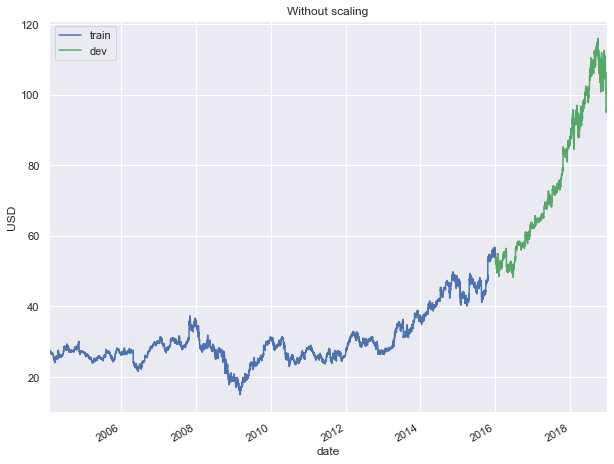

In [32]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

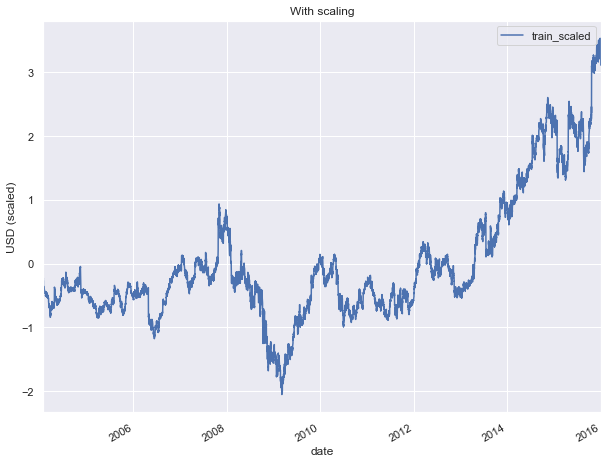

In [33]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

REGRESSION

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
polynomial_features = PolynomialFeatures(degree=2,
                                                 include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
model = pipeline.fit(X_train_scaled, y_train_scaled)


In [35]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#results = []
rmse1 = []
mape1 = []


First we are going to see if a polynomial model will model the data well enough. We will train using degrees 1 to 4 and look at teh loss functions.

***SVR***
<br>
We are going to run the same model paramters we identified for the Apple stock C=1/8 and gamma = 1/2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 11.7 s, sys: 239 ms, total: 11.9 s
Wall time: 12.2 s


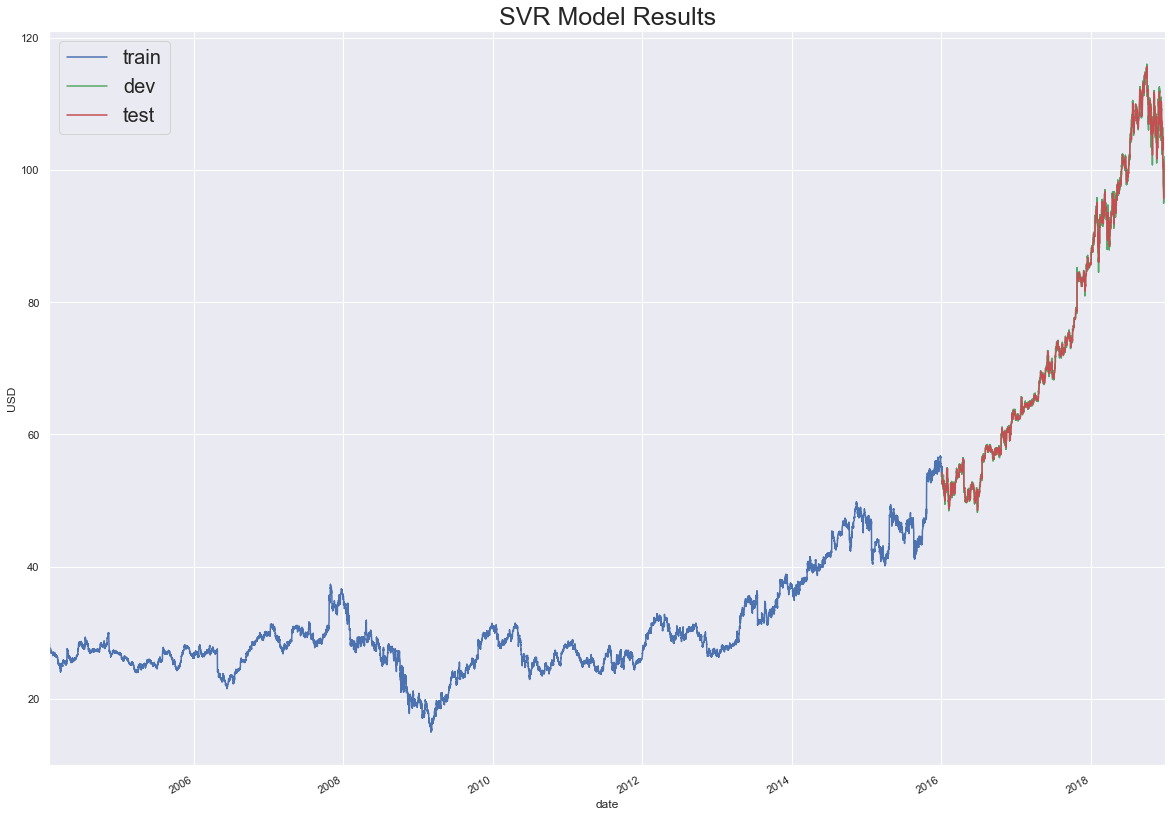

In [36]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sys
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
results = []
val = []
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
c = 1/8
g = 1/2
svr = SVR(kernel= 'rbf', C=1/8, gamma=1/2)
model = svr.fit(X_train_scaled, y_train_scaled)
est_scaled = model.predict(X_sample_scaled)
test['est_scaled'] = est_scaled
test['est'] = test['est_scaled'] * test['WEIGHTED AV. PRICE_std'] + test['WEIGHTED AV. PRICE_mean']
mse = mean_squared_error(y_sample, test['est'])
mae = mean_absolute_error(y_sample, test['est'])
rmse = math.sqrt(mean_squared_error(y_sample, test['est']))
mape = get_mape(y_sample, test['est'])
acc = model.score( X_sample, test['est'].values.reshape(-1,1))
r2 = r2_score(y_sample, test['est'])
vals = [rmse,mape,c,g,acc,r2, mse, mae]
results.append(vals)

rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='b-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='y-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_ylabel("USD")
        



Text(0, 0.5, 'USD')

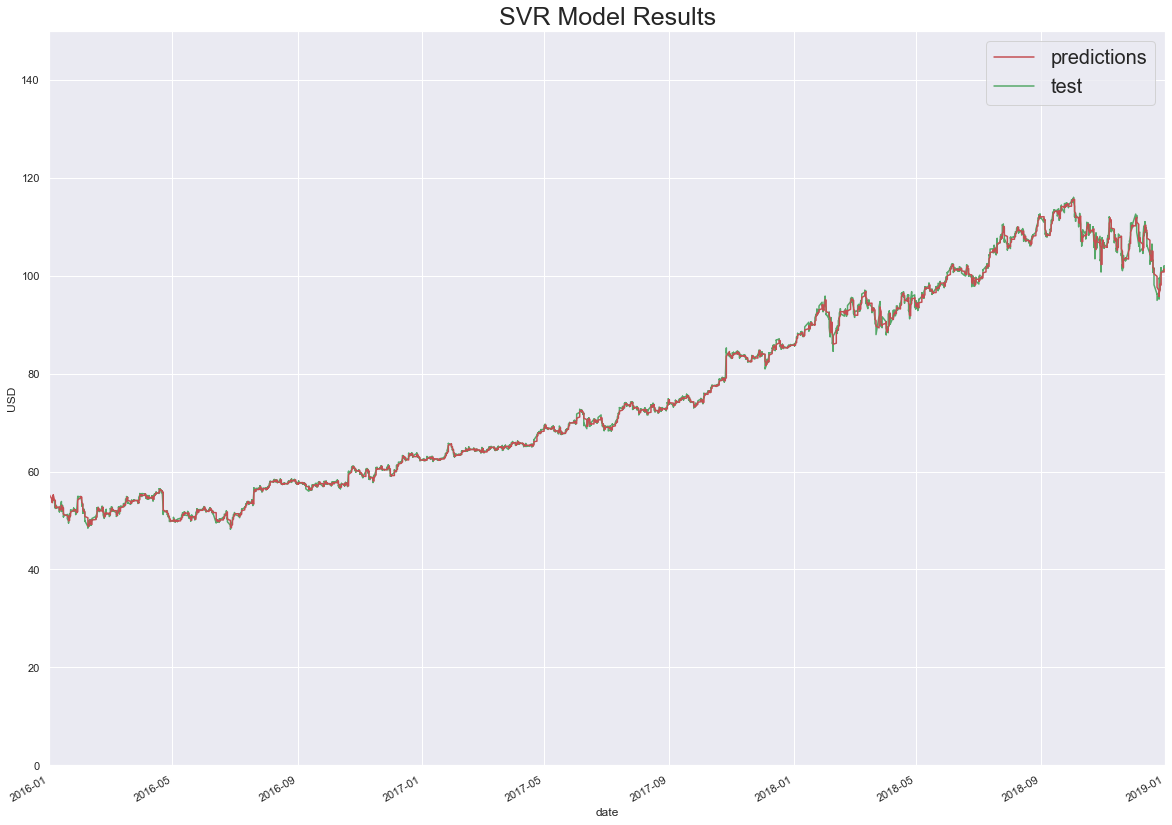

In [38]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)
rcParams['figure.figsize'] = 20, 15 # width 10, height 8

est_df = pd.DataFrame({'est': test['est'], 
                   'DATE': test['DATE']})

ax = train.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True)
#ax = cv.plot(x='DATE', y='WEIGHTED AV. PRICE', style='r-', grid=True, ax=ax)
ax = test.plot(x='DATE', y='WEIGHTED AV. PRICE', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='DATE', y='est', style='r-', grid=True, ax=ax)
ax.legend(['predictions', 'test'])
ax.set_title('SVR Model Results', fontsize=25)
ax.set_xlabel("date")
ax.set_xlim(['2016', '2019'])
ax.set_ylim([0, 150])
ax.set_ylabel("USD")

In [73]:
print("RMSE:", rmse )
print("MAPE:", mape )
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 2.4061981141582764
MAPE: 0.8412213714187593
MSE: 5.789789364578845
MAE: 1.4136209566630593
R^2: 0.9806288116370263
